In [3]:
import numpy
from PIL import Image, ImageEnhance,ImageTk
import pywt
import tkinter as tk
import math
from io import BytesIO
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from math import log10, sqrt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['log10', 'sqrt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
image_path = "/content/drive/MyDrive/Major/images/Lenna.png"
original_img = Image.open(image_path)

In [6]:
# rgba_image = Image.open(image_path)
# rgb_image = rgba_image.convert('RGB')
# temp_image=np.asarray(rgb_image)/255
# w,h,d=temp_image.shape
# or_im=temp_image.reshape(w*h*d)/255

In [7]:
def max_ndarray(mat):
    """
    Returns maximum value within a given 2D Matrix, otherwise 0
    Parameters
    ----------
    mat: numpy.ndarray
        matrix from which we want to compute the max value
    Returns
    -------
    int32:
        matrix maximum value
    """
    return np.amax(mat) if type(mat).__name__ == 'ndarray' else 0

In [8]:
def extract_rgb_coeff(img):
    """
    Returns RGB dwt applied coefficients tuple
    Parameters
    ----------
    img: PIL Image
    Returns
    -------
    (coeffs_r, coeffs_g, coeffs_b):
        RGB coefficients with Discrete Wavelet Transform Applied
    """
    (width, height) = img.size
    img = img.copy()

    mat_r = numpy.empty((width, height))
    mat_g = numpy.empty((width, height))
    mat_b = numpy.empty((width, height))

    for i in range(width):
        for j in range(height):
            (r, g, b) = img.getpixel((i, j))
            mat_r[i, j] = r
            mat_g[i, j] = g
            mat_b[i, j] = b

    coeffs_r = pywt.dwt2(mat_r, 'haar')
   
    coeffs_g = pywt.dwt2(mat_g, 'haar')
    
    coeffs_b = pywt.dwt2(mat_b, 'haar')
    
    return (coeffs_r, coeffs_g, coeffs_b)

In [9]:
def img_from_dwt_coeff(coeff_dwt):
    """
    Returns Image recreated from dwt coefficients
    Parameters
    ----------
    (coeffs_r, coeffs_g, coeffs_b):
        RGB coefficients with Discrete Wavelet Transform Applied
    Returns
    -------
    Image from dwt coefficients
    """
    # Channel Red
    (coeffs_r, coeffs_g, coeffs_b) = coeff_dwt

    cc = numpy.array((coeffs_r, coeffs_g, coeffs_b))

    (width, height) = (len(coeffs_r[0]), len(coeffs_r[0][0]))

    cARed = numpy.array(coeffs_r[0])
    cHRed = numpy.array(coeffs_r[1][0])
    cVRed = numpy.array(coeffs_r[1][1])
    cDRed = numpy.array(coeffs_r[1][2])
    # Channel Green
    cAGreen = numpy.array(coeffs_g[0])
    cHGreen = numpy.array(coeffs_g[1][0])
    cVGreen = numpy.array(coeffs_g[1][1])
    cDGreen = numpy.array(coeffs_g[1][2])
    # Channel Blue
    cABlue = numpy.array(coeffs_b[0])
    cHBlue = numpy.array(coeffs_b[1][0])
    cVBlue = numpy.array(coeffs_b[1][1])
    cDBlue = numpy.array(coeffs_b[1][2])

    # maxValue per channel par matrix
    cAMaxRed = max_ndarray(cARed)
    cAMaxGreen = max_ndarray(cAGreen)
    cAMaxBlue = max_ndarray(cABlue)

    cHMaxRed = max_ndarray(cHRed)
    cHMaxGreen = max_ndarray(cHGreen)
    cHMaxBlue = max_ndarray(cHBlue)

    cVMaxRed = max_ndarray(cVRed)
    cVMaxGreen = max_ndarray(cVGreen)
    cVMaxBlue = max_ndarray(cVBlue)

    cDMaxRed = max_ndarray(cDRed)
    cDMaxGreen = max_ndarray(cDGreen)
    cDMaxBlue = max_ndarray(cDBlue)

    # Image object init
    dwt_img = Image.new('RGB', (width, height), (0, 0, 20))
    # cA reconstruction

    '''
    The image formed from the low frequnecy of the images which contains the main content of the image
    '''
    for i in range(width):
        for j in range(height):
            R = cARed[i][j]
            R = (R/cAMaxRed)*100.0
            G = cAGreen[i][j]
            G = (G/cAMaxGreen)*100.0
            B = cABlue[i][j]
            B = (B/cAMaxBlue)*100.0
            new_value = (int(R), int(G), int(B))
            dwt_img.putpixel((i, j), new_value)
   
    return dwt_img

In [10]:
def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal . 
                  # Therefore PSNR have no importance. 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr

In [11]:
#calculating wavelet coefficients
coef = extract_rgb_coeff(original_img)

In [12]:
#reconstructing compressed image from obtained wavelet coefficients
dwt_image = img_from_dwt_coeff(coef)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  from ipykernel import kernelapp as app


In [13]:
dwt_image.save('lenna_out.png')
dwt_image.save("/content/drive/MyDrive/Major/images/compressed/lenna_compressed.png")

In [14]:
oi = image_path
ci = "lenna_out.png"

In [15]:
# # original = cv2.imread("original_image.png") 
# # compressed = cv2.imread("compressed_image.png", 1)
# original = cv2.imread(oi) 
# compressed = cv2.imread(ci, 1) 
# value = PSNR(original, compressed) 
# print(f"PSNR value is {value} dB")

In [16]:
#calculating compression ratio
ogimg = BytesIO()
original_img.save(ogimg, "png")
crimg = BytesIO()
dwt_image.save(crimg, "png")

os = ogimg.tell()
cs = crimg.tell()
cr = os/cs

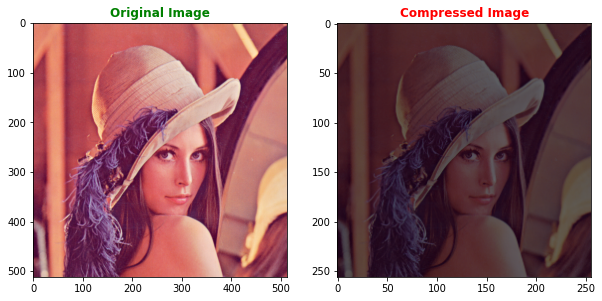

original image size
479778

compressed image size
92095

compression ratio
5.209598783864488


In [17]:
fig=plt.figure(figsize=(10, 10))

img = mpimg.imread(oi)
fig.add_subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original Image", color='green', fontweight="bold")

img = mpimg.imread(ci)
fig.add_subplot(1, 2, 2)
plt.imshow(img)
plt.title("Compressed Image", color='red', fontweight="bold")
plt.show()

print("original image size")
print(os) 
print("\ncompressed image size")
print(cs)
print("\ncompression ratio")
print(cr)

In [18]:
im = Image.open(ci)
#im = Image.open('/content/drive/MyDrive/images/compressed/lenna_out.png')
#im.save('C:/Users/Ashish/Desktop/1.png')

In [19]:
pixels = im.load()
width, height=im.size

In [20]:
key=[0]*(width*height)
all_pixels=[]
c=0
for y in range(height):
    for x in range(width):
        cpixel=pixels[x,y]
        all_pixels.append(cpixel)
        key[c]=0
        c=c+1
#for a in range(width*2):
#        print all_pixels[a]




for y in range(height-1):
    for x in range(width-2):
        if all_pixels[x+(width*y)]==0 and all_pixels[(x+1)+(width*y)]==0 and all_pixels[x+2+(width*y)]==0:
            if(all_pixels[(width*(y+1))+x+1])==0:
                key[(width*(y+1))+x+1]=1
            all_pixels[(width*(y+1))+x+1]=255
        elif all_pixels[x+(width*y)]==0 and all_pixels[x+1+(width*y)]==0 and all_pixels[x+2+(width*y)]==255:
            if(all_pixels[(width*(y+1))+x+1])==0:
                key[(width*(y+1))+x+1]=1
            all_pixels[(width*(y+1))+x+1]=255
        elif all_pixels[x+(width*y)]==0 and all_pixels[x+1+(width*y)]==255 and all_pixels[x+2+(width*y)]==0:
            if(all_pixels[(width*(y+1))+x+1])==0:
                key[(width*(y+1))+x+1]=1
            all_pixels[(width*(y+1))+x+1]=255
        elif all_pixels[x+(width*y)]==0 and all_pixels[x+1+(width*y)]==255 and all_pixels[x+2+(width*y)]==255:
            if(all_pixels[(width*(y+1))+x+1])==255:
                key[(width*(y+1))+x+1]=1
            all_pixels[(width*(y+1))+x+1]=0
        elif all_pixels[x+(width*y)]==255 and all_pixels[x+1+(width*y)]==0 and all_pixels[x+2+(width*y)]==0:
            if(all_pixels[(width*(y+1))+x+1])==255:
                key[(width*(y+1))+x+1]=1
            all_pixels[(width*(y+1))+x+1]=0
        elif all_pixels[x+(width*y)]==255 and all_pixels[x+1+(width*y)]==0 and all_pixels[x+2+(width*y)]==255:
            if(all_pixels[(width*(y+1))+x+1])==255:
                key[(width*(y+1))+x+1]=1
            all_pixels[(width*(y+1))+x+1]=0
        elif all_pixels[x+(width*y)]==255 and all_pixels[x+1+(width*y)]==255 and all_pixels[x+2+(width*y)]==0:
            if(all_pixels[(width*(y+1))+x+1])==255:
                key[(width*(y+1))+x+1]=1
            all_pixels[(width*(y+1))+x+1]=0
        elif all_pixels[x+(width*y)]==255 and all_pixels[x+1+(width*y)]==255 and all_pixels[x+2+(width*y)]==255:
            if(all_pixels[(width*(y+1))+x+1])==0:
                key[(width*(y+1))+x+1]=1
            all_pixels[(width*(y+1))+x+1]=255
cnt=0    
for y in range(height):
    for x in range(width):
        pixels[x,y]=all_pixels[cnt]
        cnt=cnt+1

In [21]:
pq = list()
pq=[0]*(int)(width/2)
print(pq)
keyrc=list()
#num=raw_input("How many elements should the Key have? (Key should contain only integers) ")
num=128
for i in range(0,int(num)):
    #n=raw_input()
    n=128
    keyrc.append(int(n))
print(keyrc)
lk=len(keyrc)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,

In [22]:
print("\nInitializing S")
s=list()
for i in range(width//2):
    s.append(int(i))
print(s)
print("Initialized")


Initializing S
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127]
Initialized


In [23]:
print("Shuffled")

print("\nShuffling S Again")
i=0
j=0
a=0
k=list()
while a<(width//2):
    i=(i+1)%(width//2)
    j=(j+s[i])%(width//2)
    temp=s[i]
    s[i]=s[j]
    s[j]=temp
    k.append(s[(s[i]+s[j])%(width//2)])
    pq[k[a]]=pq[k[a]]+1
    a=a+1
print(a)
print("k")
print(k)

Shuffled

Shuffling S Again
128
k
[2, 5, 7, 13, 13, 23, 31, 40, 40, 56, 50, 72, 86, 101, 117, 17, 3, 105, 52, 13, 95, 16, 18, 11, 118, 75, 103, 9, 40, 65, 97, 11, 112, 93, 41, 97, 107, 87, 72, 99, 73, 12, 41, 124, 9, 114, 122, 79, 1, 100, 78, 0, 13, 62, 56, 99, 100, 115, 123, 107, 71, 126, 56, 63, 114, 118, 13, 30, 98, 1, 34, 26, 66, 121, 105, 124, 126, 8, 94, 15, 116, 113, 108, 122, 17, 111, 38, 33, 67, 72, 116, 126, 77, 47, 74, 39, 62, 116, 31, 123, 101, 69, 59, 55, 121, 62, 14, 96, 100, 73, 34, 14, 81, 97, 84, 111, 101, 10, 48, 20, 6, 44, 39, 37, 41, 18, 110, 86]


In [24]:
print("\nPQ")
print(pq)
s1=0
s2=0
for i in range(width//2):
    if pq[i]==0:
        s1=s1+1
    if pq[i]>1:
        s2=s2+1
print(s1)
print(s2)


PQ
[1, 2, 1, 1, 0, 1, 1, 1, 1, 2, 1, 2, 1, 5, 2, 1, 1, 2, 2, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 2, 0, 1, 2, 0, 0, 1, 1, 2, 3, 3, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 3, 0, 0, 1, 0, 0, 3, 1, 0, 1, 1, 1, 0, 1, 0, 1, 3, 2, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 3, 1, 2, 3, 3, 0, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 1, 2, 1, 3, 1, 2, 0, 0, 2, 2, 2, 2, 0, 3, 0]
45
32


In [25]:
i=0
while i<(width//2):
    j=0
    l=0
    if pq[i]==1 or pq[i]==0:
        i=i+1
        continue
    if pq[i]>1:
        z=i
        while pq[j]!=0:
            j=j+1
        while k[l]!=z:
            l=l+1
        k[l]=j
        pq[j]=pq[j]+1
        pq[i]=pq[i]-1
    j=0
    print(i)
    print(pq[j])
    print(pq[i])
    #print "i"
    #print i
print("pq")
print(pq)


print("k")
print(k)

1
1
1
9
1
1
11
1
1
13
1
4
13
1
3
13
1
2
13
1
1
14
1
1
17
1
1
18
1
1
31
1
1
34
1
1
39
1
1
40
1
2
40
1
1
41
1
2
41
1
1
56
1
2
56
1
1
62
1
2
62
1
1
72
1
2
72
1
1
73
1
1
86
1
1
97
1
2
97
1
1
99
1
1
100
1
2
100
1
1
101
1
2
101
1
1
105
1
1
107
1
1
111
1
1
114
1
1
116
1
2
116
1
1
118
1
1
121
1
1
122
1
1
123
1
1
124
1
1
126
1
2
126
1
1
pq
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
k
[2, 5, 7, 22, 24, 23, 35, 43, 45, 51, 50, 58, 64, 83, 117, 29, 3, 88, 52, 25, 95, 16, 32, 21, 104, 75, 103, 19, 40, 65, 68, 11, 112, 93, 46, 70, 89, 87, 60, 76, 61, 12, 49, 120, 9, 91, 109, 79, 4, 80, 78, 0, 27, 54, 53, 99, 82, 115, 119, 107, 71, 125, 56, 63, 114, 118, 13, 30, 98

In [26]:
for x in range(width//2):
    for y in range(height):
        t=all_pixels[x+(y*width)]
        all_pixels[x+(y*width)]=all_pixels[k[x]+(y*width)+(width//2)]
        all_pixels[k[x]+(y*width)+(width//2)]=t
cnt=0    
for y in range(height):
    for x in range(width):
        pixels[x,y]=all_pixels[cnt]
        cnt=cnt+1
im.save("lenna_encrypt.png")
ei = "lenna_encrypt.png"
im.save('/content/drive/MyDrive/Major/images/encrypted/lenna_encrypt.png')

In [27]:
for x in range(width//2):
    for y in range(height):
        t=all_pixels[x+(y*width)]
        all_pixels[x+(y*width)]=all_pixels[k[x]+(y*width)+(width//2)]
        all_pixels[k[x]+(y*width)+(width//2)]=t
cnt=0    

cnt=0    
for y in range(height):
    for x in range(width):
        pixels[x,y]=all_pixels[cnt]
        cnt=cnt+1
im.save("lenna_decrypt.png")
di = "lenna_decrypt.png"
im.save('/content/drive/MyDrive/Major/images/encrypted/lenna_decrypt.png') 

In [28]:
cnt=0
for y in range(height):
    for x in range(width):
        if key[(width*(y))+x]==1:
            if all_pixels[(width*(y))+x]==0:
                all_pixels[(width*(y))+x]=255
            else:
                all_pixels[(width*(y))+x]=0
        pixels[x,y]=all_pixels[cnt]
        cnt=cnt+1
#im.save('/content/drive/MyDrive/images/encrypted/imagedecrypt.png')

In [29]:
from PIL import Image
import math
# Same as NPCR both are used for sensitivity analysis two encrypted image is required



# loc1="/content/drive/MyDrive/images/encrypted/imagedecrypt.png"
# loc2="/content/drive/MyDrive/images/Lenna.png"
uloc1 = ei
uloc2 = oi
def uaci(loc1,loc2):
    image1 = Image.open(loc1)
    image2 = Image.open(loc2)
    pixel1=image1.load()
    pixel2=image2.load()
    width,height=image1.size
    value=0.0
    for y in range(0,height):
        for x in range(0,width):
            value=(abs(pixel1[x,y][0]-pixel2[x,y][0])/255)+value

    value=(value/(width*height))*100
    return value
print("UACI")
print(uaci(uloc1,uloc2))

#decrypted image and original image

UACI
47.6390644148313


In [30]:
  # It has a NPCR(Number of pixel changed rate).It compares the pixel values of the original image and the encrypted image.
  # The resultant value is returned in percentage.If the value is more than 99% then the analysis is positive.
    
   # It consist of three modules rateofchange(),sumofpixel(),npcrv().




from PIL import Image
import numpy as np


 #   This method compares two image.If the pixel value is same then 0 is stored in the matrix else one is stored
# loc1="/content/drive/MyDrive/images/encrypted/imagedecrypt.png"
# loc2="/content/drive/MyDrive/images/Lenna.png"
loc1 = ei
loc2 = oi
def rateofchange(height,width,pixel1,pixel2,matrix,i):

    for y in range(0,height):
        for x in range(0,width):
            #print(x,y)
            if pixel1[x,y][i] == pixel2[x,y][i]:
                matrix[x,y]=0
            else:
                matrix[x,y]=1
    return matrix
"""
    sum of the values of 1 stored in matrix is calculated
"""
def sumofpixel(height,width,pixel1,pixel2,ematrix,i):
    matrix=rateofchange(height,width,pixel1,pixel2,ematrix,i)
    psum=0
    for y in range(0,height):
        for x in range(0,width):
            psum=matrix[x,y]+psum
    return psum

"""
Finally the above two module is called to calculate the values
"""
def npcrv(loc1,loc2):
    c1 = Image.open(loc1)
    c2 = Image.open(loc2)
    width, height = c1.size
    pixel1 = c1.load()
    pixel2 = c2.load()
    ematrix = np.empty([width, height])
    per=(((sumofpixel(height,width,pixel1,pixel2,ematrix,0)/(height*width))*100)+((sumofpixel(height,width,pixel1,pixel2,ematrix,1)/(height*width))*100)+((sumofpixel(height,width,pixel1,pixel2,ematrix,2)/(height*width))*100))/3
    return per
print("NPCR")
print(npcrv(loc1,loc2))

NPCR
99.69635009765625


In [31]:
#calculating size of encrypted and decrypted files
encrypted_img = Image.open(ei)
decrypted_img = Image.open(di)
enimg = BytesIO()
encrypted_img.save(enimg, "png")
deimg = BytesIO()
decrypted_img.save(deimg, "png")
es = enimg.tell()
ds = deimg.tell()

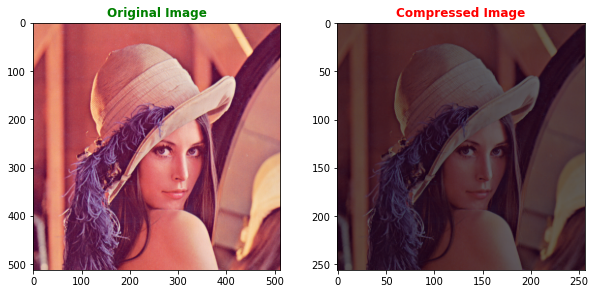

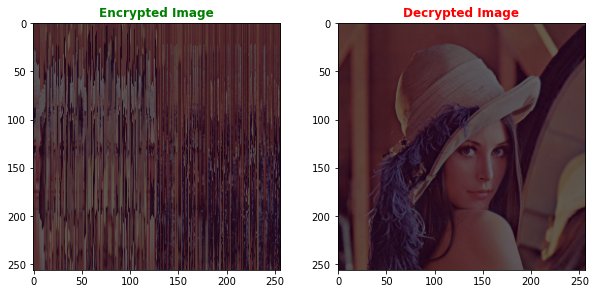

original image size
479778

compressed image size
92095

encrypted image size
93923

decrypted image size
92095

compression ratio
5.209598783864488

UACI
47.6390644148313

NPCR
99.69635009765625


In [32]:
fig=plt.figure(figsize=(10, 10))

img = mpimg.imread(oi)
fig.add_subplot(2, 2, 1)
plt.imshow(img)
plt.title("Original Image", color='green', fontweight="bold")

img = mpimg.imread(ci)
fig.add_subplot(2, 2, 2)
plt.imshow(img)
plt.title("Compressed Image", color='red', fontweight="bold")
plt.show()

fig=plt.figure(figsize=(10, 10))

img = mpimg.imread(ei)
fig.add_subplot(2, 2, 3)
plt.imshow(img)
plt.title("Encrypted Image", color='green', fontweight="bold")

img = mpimg.imread(di)
fig.add_subplot(2, 2, 4)
plt.imshow(img)
plt.title("Decrypted Image", color='red', fontweight="bold")
plt.show()

print("original image size")
print(os) 
print("\ncompressed image size")
print(cs)
print("\nencrypted image size")
print(es) 
print("\ndecrypted image size")
print(ds)
print("\ncompression ratio")
print(cr)
print("\nUACI")
print(uaci(uloc1,uloc2))
print("\nNPCR")
print(npcrv(loc1,loc2))